In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')



from sklearn.feature_extraction.text import CountVectorizer


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/heatherrobbins/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
neutral = pd.read_csv('data/neutral.csv')
toxic = pd.read_csv('data/toxic.csv')

In [3]:
neutral.head(1)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,pos,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,lemmatized_text
0,0,0,0,0,0,0,1,Explanation\nWhy the edits made under my usern...,Explanation Why the edits made under my userna...,0.5574,...,0.103,43,264,10,17,0,0,0,0,Explanation edits username Hardcore Metallica ...


In [4]:
neutral.isnull().sum()

toxic                  0
severe_toxic           0
obscene                0
threat                 0
insult                 0
identity_hate          0
neutral                0
comment_text           0
cleaner_text           0
compound               0
neg                    0
neu                    0
pos                    0
word count             0
character count        0
special characters     0
capitalized letters    0
swear words            0
misogynist words       0
racial_ethnic slurs    0
lgbtq hate             0
lemmatized_text        0
dtype: int64

In [5]:
toxic.isnull().sum()

toxic                  0
severe_toxic           0
obscene                0
threat                 0
insult                 0
identity_hate          0
neutral                0
comment_text           0
cleaner_text           0
compound               0
neg                    0
neu                    0
pos                    0
word count             0
character count        0
special characters     0
capitalized letters    0
swear words            0
misogynist words       0
racial_ethnic slurs    0
lgbtq hate             0
lemmatized_text        0
dtype: int64

In [6]:
neutral[neutral['lemmatized_text'].isnull()]

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,pos,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,lemmatized_text


In [7]:
neutral.dropna(inplace = True)

In [8]:
neutral.isnull().sum()

toxic                  0
severe_toxic           0
obscene                0
threat                 0
insult                 0
identity_hate          0
neutral                0
comment_text           0
cleaner_text           0
compound               0
neg                    0
neu                    0
pos                    0
word count             0
character count        0
special characters     0
capitalized letters    0
swear words            0
misogynist words       0
racial_ethnic slurs    0
lgbtq hate             0
lemmatized_text        0
dtype: int64

In [9]:
#overwrite the other neutral csv so there aren't any nulls

neutral.to_csv('neutral.csv', index = False)

In [12]:
def vectorize_and_viz(text, ngram_range):
    cvec = CountVectorizer(ngram_range = ngram_range)
    vectorized = cvec.fit_transform(text)
    vector_df = pd.DataFrame(vectorized.todense(), 
                              columns=cvec.get_feature_names())
    
    vector_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');
    

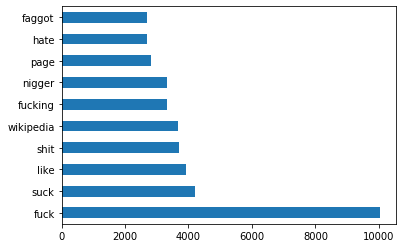

In [13]:
vectorize_and_viz(toxic['lemmatized_text'], (1, 1))

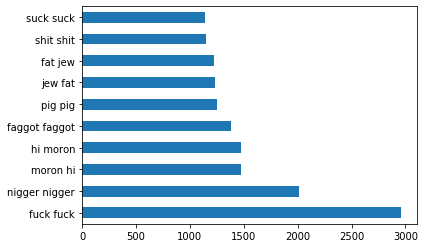

In [14]:
vectorize_and_viz(toxic['lemmatized_text'], ((2, 2)))

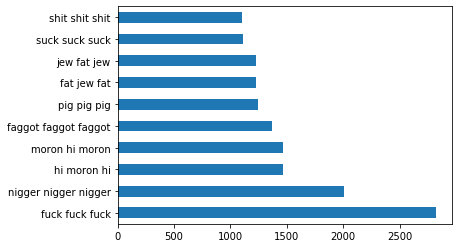

In [15]:
vectorize_and_viz(toxic['lemmatized_text'], (3, 3))

If there's time, I'd like to include these words as custom stop words to see if there's anything deeper in the data.

In [16]:
#create random sample for neutral text since full set is killing kernal. Will use google collab on full set, but want to keep this moving for now

In [17]:
toxic.shape, neutral.shape

((16225, 22), (143330, 22))

In [18]:
# Get a random sample of rows
sample_size = toxic.shape[0]
neutral_random_sample = neutral.sample(n=sample_size)

In [22]:
neutral_random_sample.to_csv('neutral_sample.csv', index = False)

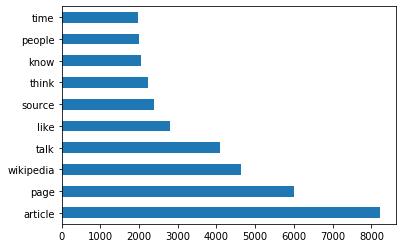

In [19]:
vectorize_and_viz(neutral_random_sample['lemmatized_text'], (1, 1))

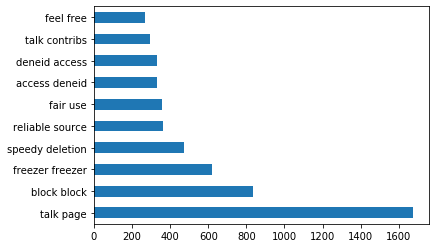

In [20]:
vectorize_and_viz(neutral_random_sample['lemmatized_text'], (2, 2))

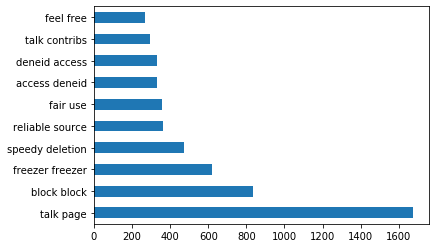

In [21]:
vectorize_and_viz(neutral_random_sample['lemmatized_text'], (2, 2))